In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/health_claims_data.xlsx - Sheet1.csv')
df

Mounted at /content/drive


,Age,Gender,Smoker,Health Rate,Safety Rate,Claim (USD),Premium
0,45,Female,Yes,0.229251,0.445305,1548.500000,2137.651004
1,39,Female,No,0.722253,0.514817,0.000000,673.791169
2,46,Male,No,0.720037,0.359233,483.410000,896.956226
3,55,Female,No,0.641148,0.592951,5.740000,730.352752
4,38,Male,No,0.693948,0.163524,0.000000,1280.024100
...,...,...,...,...,...,...,...
595,35,Female,Yes,0.180977,0.831697,808.190000,689.220001
596,37,Male,No,0.854385,0.273071,0.000000,529.258631
597,30,Female,Yes,0.492278,0.518079,0.000000,1223.410409
598,36,Female,Yes,0.247231,0.298726,2096.240000,2639.487983


This dataset has health insurance data from https://www.kaggle.com/datasets/dlr47685/health-data. Each row is a synthetic person, and it includes the persons age, gender, if they smoke, a health rate from 0 to 1 with 1 being the most healthy, a safety rate from 0 to 1 with 1 being the safest, and then their total claims payed out, and also how much their Premium is. I chose this dataset because I have just came back from a risk managment camp so I thought it would be fun to put what I learned into action and work with insurance data.

In [ ]:
df['Combined Rate'] = df['Health Rate'] * df['Safety Rate']
df_men = df[df.Gender == 'Male']
df_women = df[df.Gender == 'Female']
df_smokers = df[df.Smoker == 'Yes']
df_no_smokers = df[df.Smoker == 'No']
df_young = df[df.Age <40]
df_old = df[df.Age >= 40]

I made the combined Rate Health Rate * Safety Rate because if either one is lower, then the risk increases more because if someone is healthy, but they are really unsafe, then they are still likely to get injured. So by multiplying them, when one is low, the combined rating is low.

In [ ]:
df['Claim (USD)'].mean()


np.float64(857.9357571423781)

In [ ]:
df['Premium'].sum()-df['Claim (USD)'].sum()

np.float64(220761.0551004032)

This means that from the people in the dataset, the insurance company would have made 220,761.06 plus what ever thge deductibles were.

In [ ]:
df['Claim (USD)'].median()


0.0

The median for total claims is $0, which means that over half of the people in the dataset had no claims.

<Axes: title={'center': 'Distribution of Total Amount of Claims'}, ylabel='Total Claim Amount (USD)'>

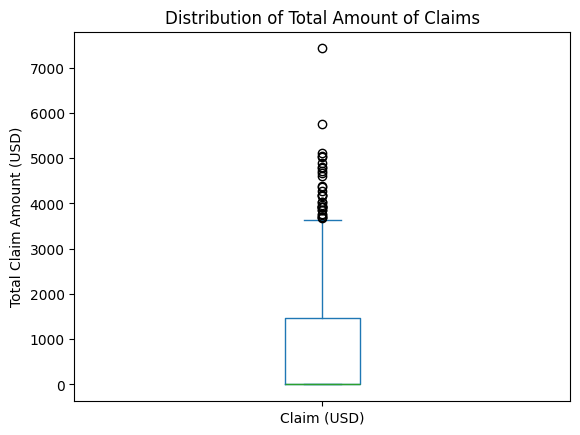

In [ ]:
df.plot.box(column = 'Claim (USD)', ylabel = 'Total Claim Amount (USD)', grid=False, title = 'Distribution of Total Amount of Claims')

The graph of the claims is right skewed which makes sense for an insurance because most of the time there is going to be no loss, and people get insurance just for the rare chance that they get a big loss, but there is going to be very few cases of that.

<Axes: title={'center': 'Total Claim Amount vs. Combined Rate'}, xlabel='Combined Rate (Health Rate * Safety Rate)', ylabel='Claim (USD)'>

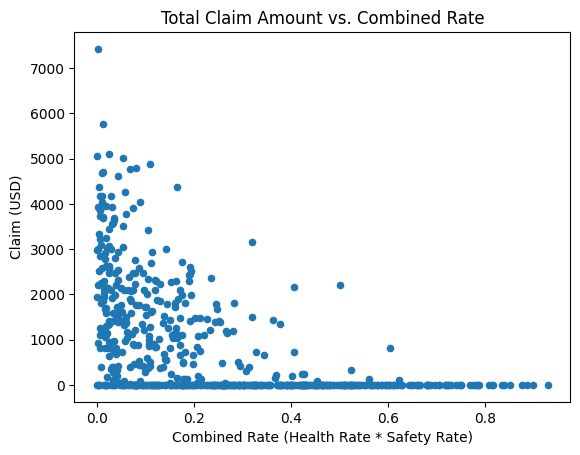

In [ ]:
df.plot.scatter(x = 'Combined Rate', y = 'Claim (USD)', title = 'Total Claim Amount vs. Combined Rate', xlabel = 'Combined Rate (Health Rate * Safety Rate)')

The total claims graphed vs the combined rate shows that as the combined rate increases (which basically means that the person has less risk), the total claims generally decreases.

<Axes: title={'center': 'Distribution of Ages of People'}, ylabel='Frequency'>

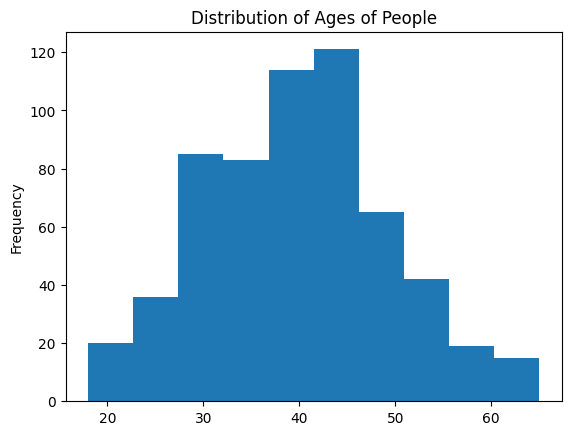

In [ ]:
df['Age'].plot.hist(title = 'Distribution of Ages of People')

In [ ]:
print("The Average Health Rate is: " + str(df['Health Rate'].mean()))
print("The Average Safety Rate is: " + str(df['Safety Rate'].mean()))
print("The Average Combined Rate is: " + str(df['Combined Rate'].mean()))


The Average Health Rate is: 0.5036687480540684
The Average Safety Rate is: 0.49791548708047334
The Average Combined Rate is: 0.24675840492991288


The average health and safety rate is about 0.5 for each, and because the combined rate is them multiplied by each other, the average combined rate is about 0.25. This means that the average person has a combined rate of 0.25, and health and safety ratings of about 0.25

Data Science: Clustering


---


Question: Which of the factors are the biggest contributors to predict risk factor and therefore total losses?




In [ ]:
model = KMeans(n_clusters=4)
df['Smoker_Encoded'] = df['Smoker'].replace({'Yes': 1, 'No': 0})
df['Gender_Encoded'] = df['Gender'].replace({'Male': 1, 'Female': 0})
ind = [ 'Combined Rate', 'Age', 'Smoker_Encoded', 'Gender_Encoded']
model.fit(df[ind])
df['Cluster'] = model.predict(df[ind])


/tmp/ipython-input-12-1244494786.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoker_Encoded'] = df['Smoker'].replace({'Yes': 1, 'No': 0})


<Axes: title={'center': 'Total Claims vs Age'}, xlabel='Age', ylabel='Claim (USD)'>

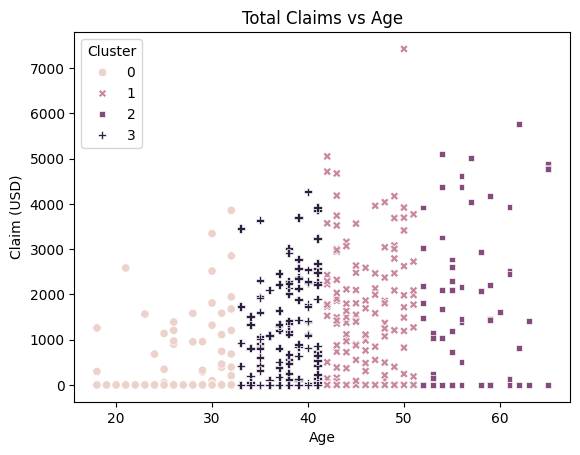

In [ ]:
graph = sns.scatterplot(x = df['Age'], y = df['Claim (USD)'], hue = df['Cluster'], style = df['Cluster'],)
graph.set_title('Total Claims vs Age')
graph

The clusters were pretty much made all from the age of the person, which lets us see that as a person gets older their risk gets much higher. This makes sense because as a person gets older, they usually get sick or injured more often and it is harder to heal.

Conclusion: Age is the biggest factor in predicting the risk factor and the total claim amount for insurance companies when they try to set the prices for people's health insurance.